In [322]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
%matplotlib inline

In [324]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,172.0,72.0,74
1,female,group C,some college,standard,completed,NaN,NaN,88
2,female,group B,master's degree,standard,none,90.0,95.0,93
3,male,group A,associate's degree,free/reduced,none,47.0,NaN,44
4,male,group C,some college,standard,none,-9.0,78.0,75


In [325]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     1
reading score                  2
writing score                  0
dtype: int64

In [326]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     1
reading score                  2
writing score                  0
dtype: int64

In [327]:
math_mean = df['math score'].mean()

In [328]:
df["math score"].fillna(math_mean,inplace=True)

In [329]:
read_mean = df['reading score'].mean()

In [330]:
df["reading score"].fillna(read_mean,inplace=True)

In [331]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

C:\Users\L470_2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score'>

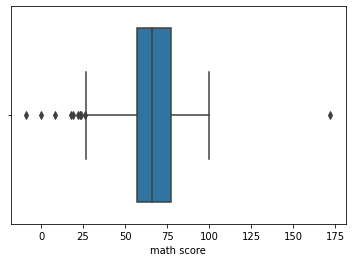

In [332]:
sns.boxplot(df["math score"])

In [333]:
Q1 = df['math score'].quantile(0.25)

In [334]:
Q2 = df['math score'].quantile(0.75)

In [335]:
Q1,Q2

(57.0, 77.0)

In [336]:
IQR = Q2-Q1

In [337]:
IQR

20.0

In [338]:
lowerlimit = Q1 - 1.5 * IQR
upperlimit = Q2 + 1.5*IQR

In [339]:
lowerlimit, upperlimit

(27.0, 107.0)

In [340]:
 df_without_outlier  = df[(df['math score']>lowerlimit)&(df['math score']<upperlimit)]

In [341]:
df_without_outlier

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,66.101101,69.160321,88
2,female,group B,master's degree,standard,none,90.000000,95.000000,93
3,male,group A,associate's degree,free/reduced,none,47.000000,69.160321,44
5,female,group B,associate's degree,standard,none,71.000000,83.000000,78
6,female,group B,some college,standard,completed,88.000000,95.000000,92
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.000000,99.000000,95
996,male,group C,high school,free/reduced,none,62.000000,55.000000,55
997,female,group C,high school,free/reduced,completed,59.000000,71.000000,65
998,female,group D,some college,standard,completed,68.000000,78.000000,77


C:\Users\L470_2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score'>

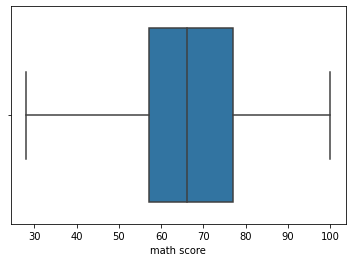

In [342]:
sns.boxplot(df_without_outlier["math score"])

C:\Users\L470_2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reading score'>

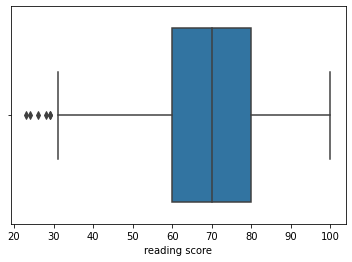

In [343]:
sns.boxplot(df_without_outlier["reading score"])

In [344]:
QR1 = df_without_outlier["reading score"].quantile(0.25)
QR2 = df_without_outlier["reading score"].quantile(0.75)

IQR = QR2 - QR1
IQR

20.0

In [345]:
upper = QR1 - 1.5*IQR
lower = QR2 + 1.5*IQR

In [346]:
upper,lower

(30.0, 110.0)

In [347]:
dfx = df_without_outlier[(df_without_outlier["reading score"]<lower)|(df_without_outlier['reading score']>upper)]

In [348]:
dfx

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,66.101101,69.160321,88
2,female,group B,master's degree,standard,none,90.000000,95.000000,93
3,male,group A,associate's degree,free/reduced,none,47.000000,69.160321,44
5,female,group B,associate's degree,standard,none,71.000000,83.000000,78
6,female,group B,some college,standard,completed,88.000000,95.000000,92
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.000000,99.000000,95
996,male,group C,high school,free/reduced,none,62.000000,55.000000,55
997,female,group C,high school,free/reduced,completed,59.000000,71.000000,65
998,female,group D,some college,standard,completed,68.000000,78.000000,77


C:\Users\L470_2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reading score'>

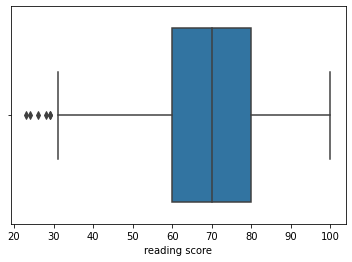

In [349]:
sns.boxplot(dfx['reading score'])

In [350]:
dfx.describe()

,math score,reading score,writing score
count,988.000000,988.000000,988.000000
mean,66.542612,69.513482,68.431174
std,14.476236,14.185290,14.758314
min,28.000000,23.000000,15.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [351]:
df.skew()

C:\Users\L470_2\AppData\Local\Temp\ipykernel_2732\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


math score      -0.055681
reading score   -0.260723
writing score   -0.289444
dtype: float64

In [352]:
df.std()

C:\Users\L470_2\AppData\Local\Temp\ipykernel_2732\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


math score       15.705077
reading score    14.580224
writing score    15.195657
dtype: float64

array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

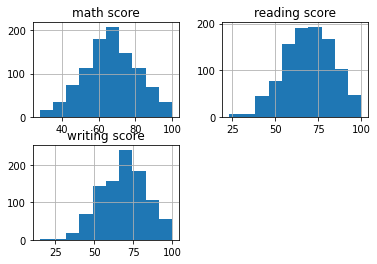

In [353]:
dfx.hist()

<AxesSubplot:>

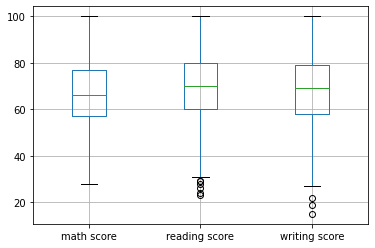

In [354]:
dfx.boxplot()

<AxesSubplot:xlabel='reading score reciprocal', ylabel='Density'>

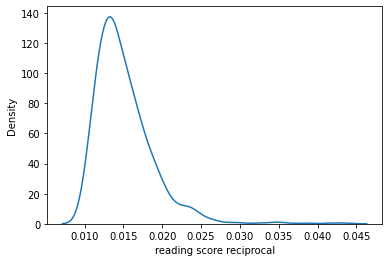

In [355]:
dfx["reading score reciprocal"] = 1/dfx['reading score']
sns.kdeplot(dfx['reading score reciprocal'])

<AxesSubplot:xlabel='reading score', ylabel='Density'>

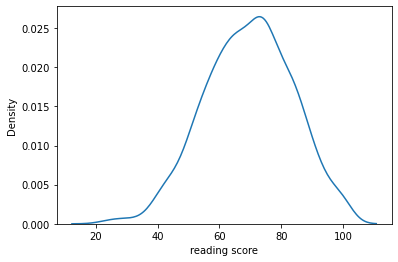

In [358]:
sns.kdeplot(dfx['reading score'])

((array([-3.19410727e+00, -2.92862832e+00, -2.78046228e+00, -2.67595340e+00,
         -2.59441353e+00, -2.52716372e+00, -2.46970815e+00, -2.41940604e+00,
         -2.37456967e+00, -2.33405267e+00, -2.29703965e+00, -2.26292923e+00,
         -2.23126477e+00, -2.20169104e+00, -2.17392612e+00, -2.14774237e+00,
         -2.12295322e+00, -2.09940385e+00, -2.07696424e+00, -2.05552417e+00,
         -2.03498932e+00, -2.01527836e+00, -1.99632062e+00, -1.97805432e+00,
         -1.96042511e+00, -1.94338493e+00, -1.92689103e+00, -1.91090528e+00,
         -1.89539343e+00, -1.88032467e+00, -1.86567116e+00, -1.85140764e+00,
         -1.83751113e+00, -1.82396067e+00, -1.81073706e+00, -1.79782272e+00,
         -1.78520143e+00, -1.77285827e+00, -1.76077946e+00, -1.74895220e+00,
         -1.73736465e+00, -1.72600580e+00, -1.71486537e+00, -1.70393379e+00,
         -1.69320212e+00, -1.68266198e+00, -1.67230553e+00, -1.66212540e+00,
         -1.65211467e+00, -1.64226681e+00, -1.63257570e+00, -1.62303553e+00,

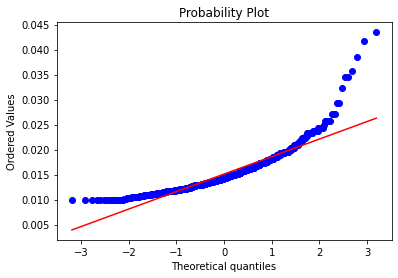

In [356]:
import scipy.stats as stats
import pylab
stats.probplot(dfx["reading score reciprocal"],plot=pylab)

In [357]:
pd.get_dummies(dfx,columns=["gender"])

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,reading score reciprocal,gender_female,gender_male
1,group C,some college,standard,completed,66.101101,69.160321,88,0.014459,1,0
2,group B,master's degree,standard,none,90.000000,95.000000,93,0.010526,1,0
3,group A,associate's degree,free/reduced,none,47.000000,69.160321,44,0.014459,0,1
5,group B,associate's degree,standard,none,71.000000,83.000000,78,0.012048,1,0
6,group B,some college,standard,completed,88.000000,95.000000,92,0.010526,1,0
...,...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88.000000,99.000000,95,0.010101,1,0
996,group C,high school,free/reduced,none,62.000000,55.000000,55,0.018182,0,1
997,group C,high school,free/reduced,completed,59.000000,71.000000,65,0.014085,1,0
998,group D,some college,standard,completed,68.000000,78.000000,77,0.012821,1,0


In [362]:
dfx.skew()


C:\Users\L470_2\AppData\Local\Temp\ipykernel_2732\174186129.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfx.skew()


math score                 -0.042789
reading score              -0.172558
writing score              -0.191399
reading score reciprocal    2.166358
dtype: float64

In [366]:
sk = np.log(dfx["reading score reciprocal"])
dfx["reading score reciprocal"] = sk
dfx.skew()

C:\Users\L470_2\AppData\Local\Temp\ipykernel_2732\3911642231.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfx.skew()


math score                 -0.042789
reading score              -0.172558
writing score              -0.191399
reading score reciprocal    0.898662
dtype: float64

<AxesSubplot:xlabel='reading score reciprocal', ylabel='Density'>

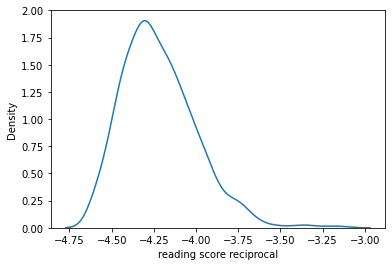

In [367]:
sns.kdeplot(dfx["reading score reciprocal"])